In [1]:
import pandas as pd

df = df = pd.read_csv("C:\\Users\\USER\\Desktop\\PROJECTSSSSSS\\Python New Projects\\Olympic Games Data Analysis\\athlete_events.csv")

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
# checking the size of the dataset

df.shape

(271116, 15)

## DATA PREPARATION AND CLEANING

In [4]:
# identify the columns containing null values

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Age', 'Height', 'Weight', 'Medal']


As Age, height, weight are numerical columns. Replacing those values by zero.<br>
For Medal I will replace the NaN values by None. <br>
Also converting the Age fielding to integer.

In [5]:
df[['Age','Height','Weight']] = df[['Age','Height','Weight']].fillna(0)

df.Medal = df.Medal.fillna('None')

df.Age = df.Age.astype(int)

## Exploratory Analysis and Visualization
Before we ask questions on the Olympic datasets, it would help to understand the participants ‘ demographics, i.e., country, age, gender etc.<br>
It’s essential to explore these variables to understand how representative the participants is of the worldwide sports community.

## Top countries participating in Olympics

In [6]:
top_countries = df.Team.value_counts().sort_values(ascending=False).head(10)
top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

### I use the seaborn library to build the visualization

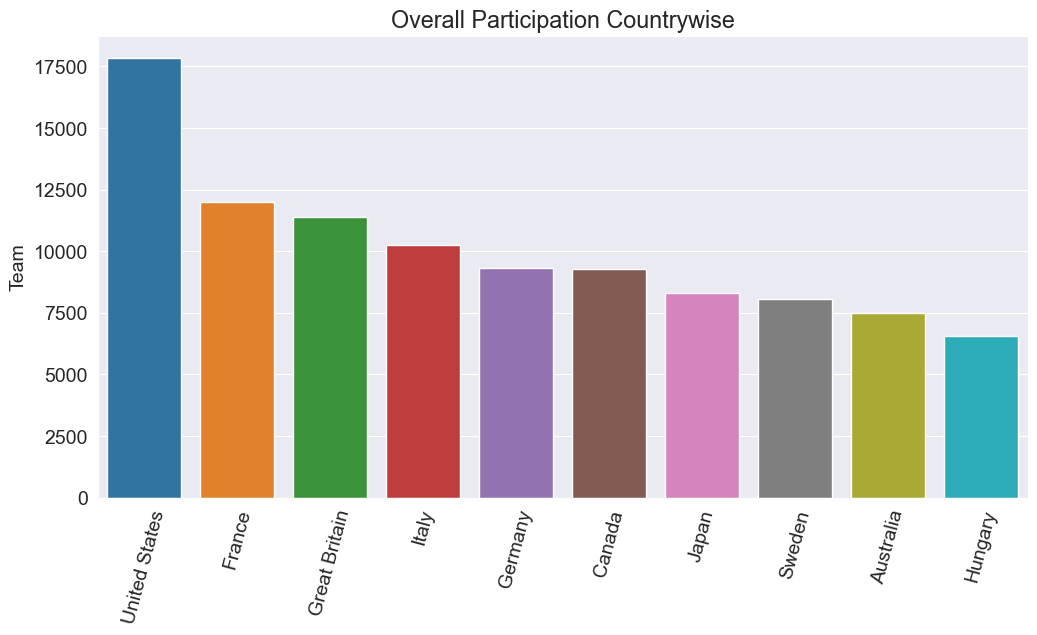

In [7]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Overall Participation Countrywise')
sns.barplot(x=top_countries.index, y=top_countries);

As USA has historically won maximum no of medals it would make sense the participation is highest from US.

### Age Distribution

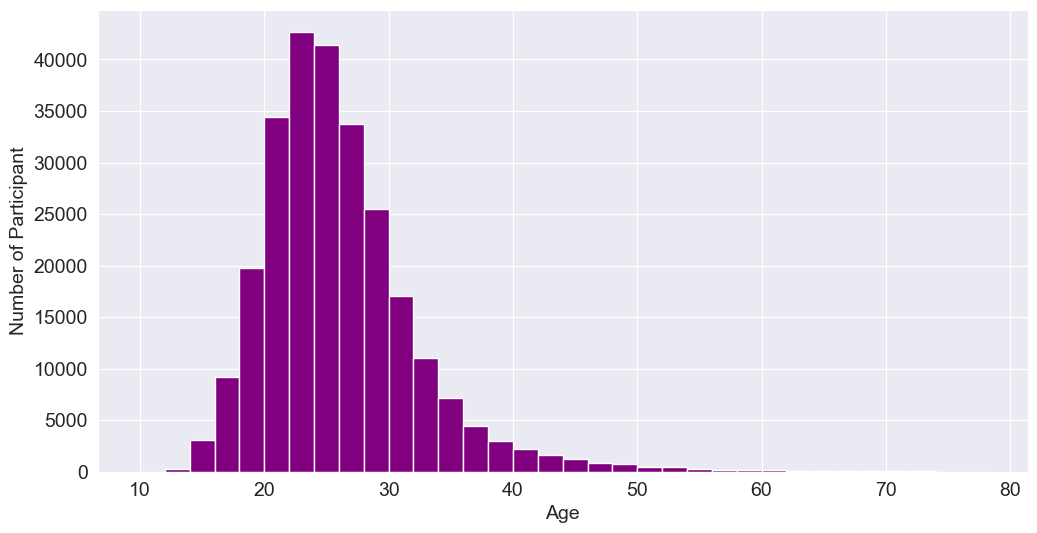

In [8]:
import numpy as np
plt.figure(figsize=(12, 6))
# plt.title(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Participant')

plt.hist(df.Age, bins=np.arange(10,80,2), color='purple');

From the above distribution we observe maximum participants are of age between 22–26 years, Which would make sense as it is likely for people with less age would perform better in active sport.

### Gender Distribution

In [9]:
gender_counts = df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

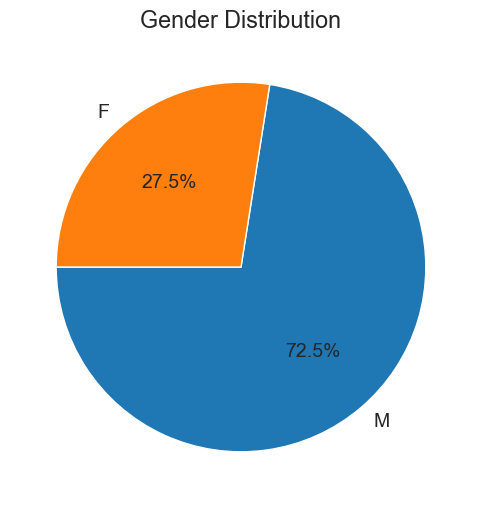

In [10]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Male seems to be dominating in terms of participation. Let us check the female participants of the years 1900 to 2016

In [11]:
female_participants = df[(df.Sex=='F') & (df.Season=='Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


C:\Users\USER\AppData\Local\Temp\ipykernel_21356\4061111979.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


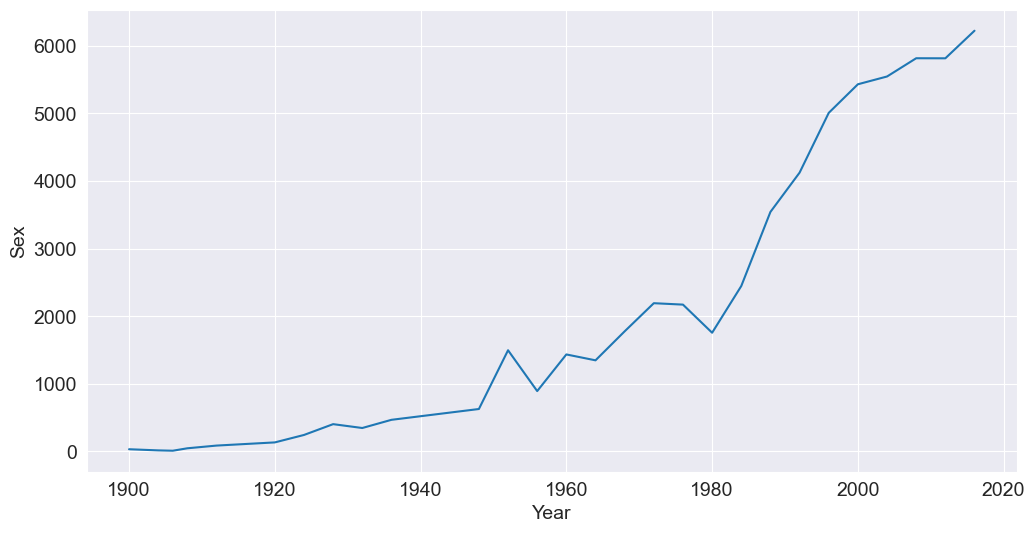

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

plt.figure(figsize=(12,6))

sns.lineplot(
    data=female_participants, x="Year", y="Sex",  err_style="bars", ci=68
);

Although the female participation in 27.5% over the years it has increased significantly as displayed above.

### Participants across seasons

In [13]:
Diff_seasons = df.Season.value_counts()
Diff_seasons

Summer    222552
Winter     48564
Name: Season, dtype: int64

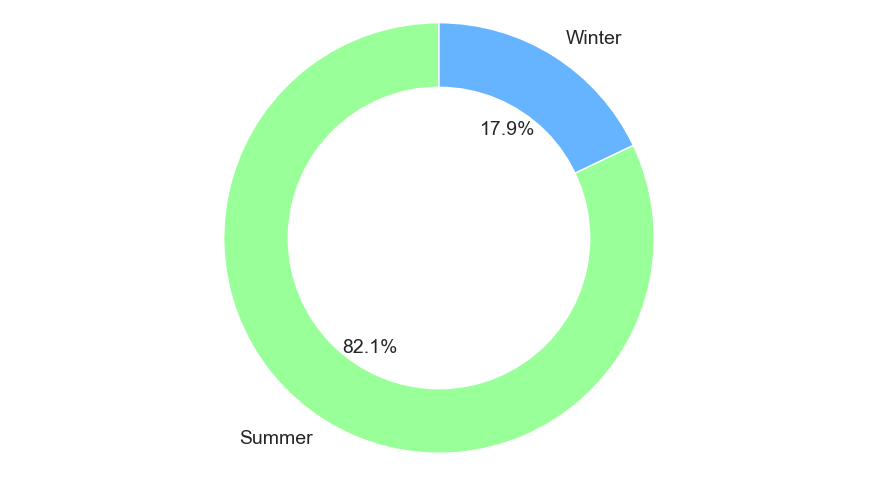

In [14]:
fig1, ax1 = plt.subplots()

colors = ['#99ff99','#66b3ff']

ax1.pie(Diff_seasons, colors = colors, labels=Diff_seasons.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

Why winter Olympic has fewer participants,<br> Lets try to explore the sports and event across winter and summer Olympics

In [15]:
winter_olympic = df[df.Season=='Winter']
winter_sports = len(winter_olympic[['Sport']].drop_duplicates())
winter_events = len(winter_olympic[['Event']].drop_duplicates())
print(f'Sports Played: {winter_sports}, Events held: {winter_events}')

Sports Played: 17, Events held: 119


In [16]:
summer_olympic = df[df.Season=='Summer']
summer_sports = len(summer_olympic[['Sport']].drop_duplicates())
summer_events = len(summer_olympic[['Event']].drop_duplicates())
print(f'Sports Played: {summer_sports}, Events held: {summer_events}')

Sports Played: 52, Events held: 651


As per the above data we have 52 sports and 651 events in summer Olympics where we have 17 sports and 119 events in winter Olympics. Hence we have higher number of participants in summer Olympics

<b>Q: Which countries WON the maximum Gold Medals in last held Olympic competitions?<b>

In [17]:
max_year = df.Year.max()

team_list = df[(df.Year == max_year) & (df.Medal=='Gold')].Team

team_list.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

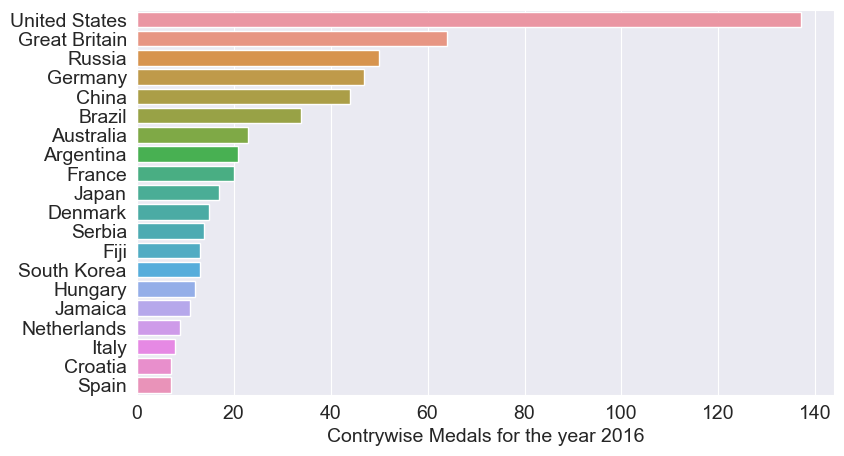

In [18]:
sns.barplot(x=team_list.value_counts().head(20), y=team_list.value_counts().head(20).index)

# plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Contrywise Medals for the year 2016');

US seems to lead the Gold medal charts for the last held Olympics in the year 2016. I am curious to know which sport fetch the most gold medals.

In [19]:
US_Gold = df[(df.Year == max_year) & (df.Medal=='Gold') & (df.Team == 'United States')]
US_Gold = US_Gold[['Sport','Medal']].groupby('Sport').count()
US_Gold.reset_index(inplace=True)
Top_sports = US_Gold.sort_values('Medal', ascending=False)
Top_sports.head()

,Sport,Medal
8,Swimming,48
0,Athletics,27
1,Basketball,24
10,Water Polo,13
6,Rowing,9


It seems like Swimming fetched the maximum Gold medals to US. Below is the visual representation of the same.

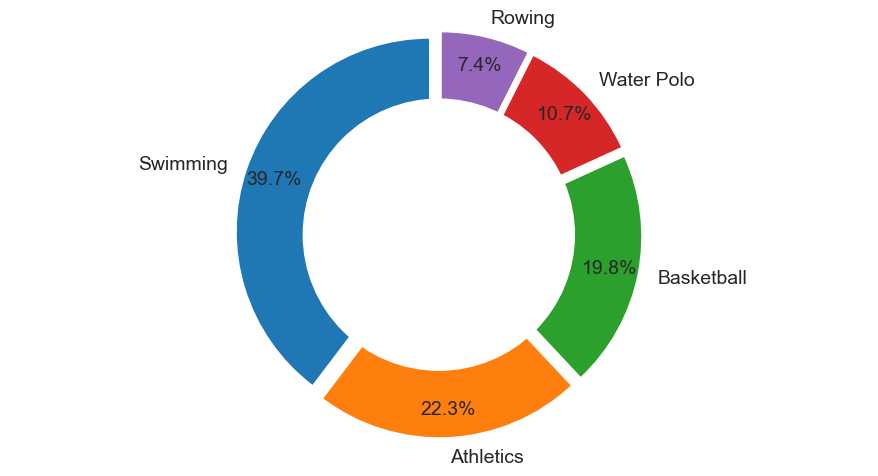

In [20]:
fig1, ax1 = plt.subplots()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#explsion
explode = (0.05,0.05,0.05,0.05,0.05)

ax1.pie(Top_sports.head()['Medal'], colors = colors, labels= Top_sports.head()['Sport'], autopct='%1.1f%%', startangle=90
       , pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

<b>Q: Countries winning maximum Medals per year ?<b>

In [24]:
! pip install pandasql --upgrade --quiet
from pandasql import sqldf
output = sqldf('''
select Team, Year, max(Highest_Number_Of_Medals_per_Year) as 'Highest_Number_Of_Medals_per_Year' from (
select Team, Year, sum(Highest_Number_Of_Medals_per_Year) as 'Highest_Number_Of_Medals_per_Year' from (
select Name, Team, Medal, Year, count(*) as 'Highest_Number_Of_Medals_per_Year'
from df 
where 
Medal <>'None'
and
Season = 'Summer'
group by Year, Medal, Team, Name 
order by Year desc, Highest_Number_Of_Medals_per_Year)
group by Team, Year
order by Year, Highest_Number_Of_Medals_per_Year desc)
group by Year
order by Year desc
 ''')

  Building wheel for pandasql (setup.py) ... done

In [25]:
output

,Team,Year,Highest_Number_Of_Medals_per_Year
0,United States,2016,256
1,United States,2012,238
2,United States,2008,309
3,United States,2004,259
4,United States,2000,240
5,United States,1996,255
6,United States,1992,222
7,Soviet Union,1988,300
8,United States,1984,352
9,Soviet Union,1980,442


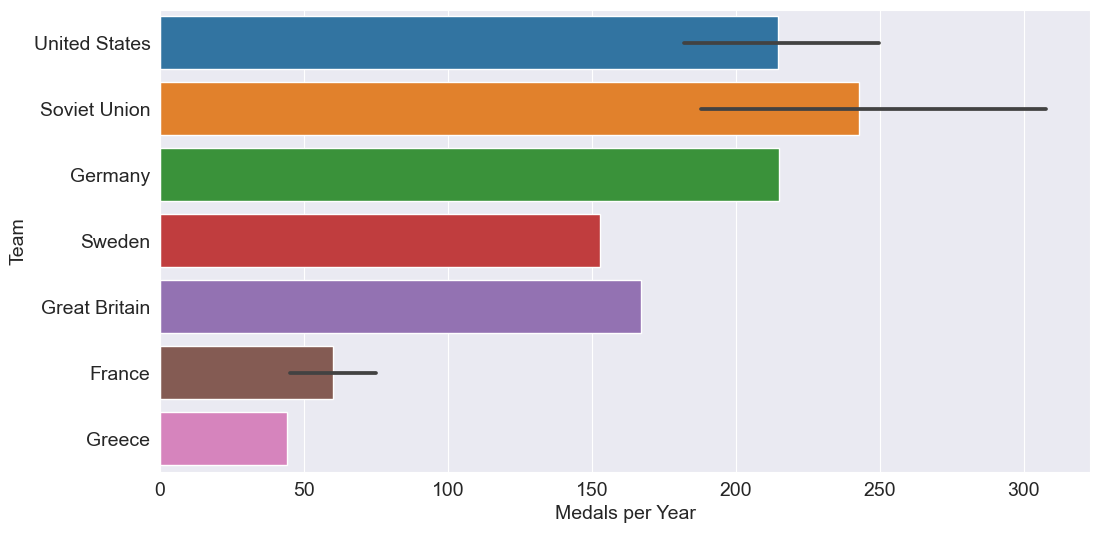

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=output.Highest_Number_Of_Medals_per_Year, y=output.Team)
plt.title("");
plt.xlabel('Medals per Year');

### <u>Following are the insights we derive from above visuals<u>

- US seems to have been winning maximum medals for most number of years.<br>
- Sovient union seems to have Won highest number of medals in a Olympic event.<br>
- The winning variance in maximum with sovient union.<br>
- Germany, Sweden, Great Britain and Greece has won maximum medals once.<br>

<b>Q: Top 10 Individual winning maximum number of Olympics Medals for their country<b>

In [26]:
df_medal_holders = df[df.Medal !='None']
df_medal_holders['Count_Of_Medals'] = 1
df_medal_holders.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_21356\2599394061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medal_holders['Count_Of_Medals'] = 1


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Count_Of_Medals
3,4,Edgar Lindenau Aabye,M,34,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
37,15,Arvo Ossian Aaltonen,M,30,0.0,0.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1
38,15,Arvo Ossian Aaltonen,M,30,0.0,0.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1
40,16,Juhamatti Tapio Aaltonen,M,28,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1
41,17,Paavo Johannes Aaltonen,M,28,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1


In [27]:
df_highest_medals = df_medal_holders[['Name', 'Year', 'Team', 'Count_Of_Medals']].groupby(['Name','Year','Team']).sum().sort_values('Count_Of_Medals', ascending=False)

df_highest_medals = df_highest_medals.groupby(['Name','Team']).sum().sort_values('Count_Of_Medals', ascending=False).head(10)
df_highest_medals.reset_index(inplace=True)

In [28]:
df_highest_medals

,Name,Team,Count_Of_Medals
0,"Michael Fred Phelps, II",United States,28
1,Larysa Semenivna Latynina (Diriy-),Soviet Union,18
2,Nikolay Yefimovich Andrianov,Soviet Union,15
3,Ole Einar Bjrndalen,Norway,13
4,Borys Anfiyanovych Shakhlin,Soviet Union,13
5,Edoardo Mangiarotti,Italy,13
6,Takashi Ono,Japan,13
7,Paavo Johannes Nurmi,Finland,12
8,Sawao Kato,Japan,12
9,"Dara Grace Torres (-Hoffman, -Minas)",United States,12


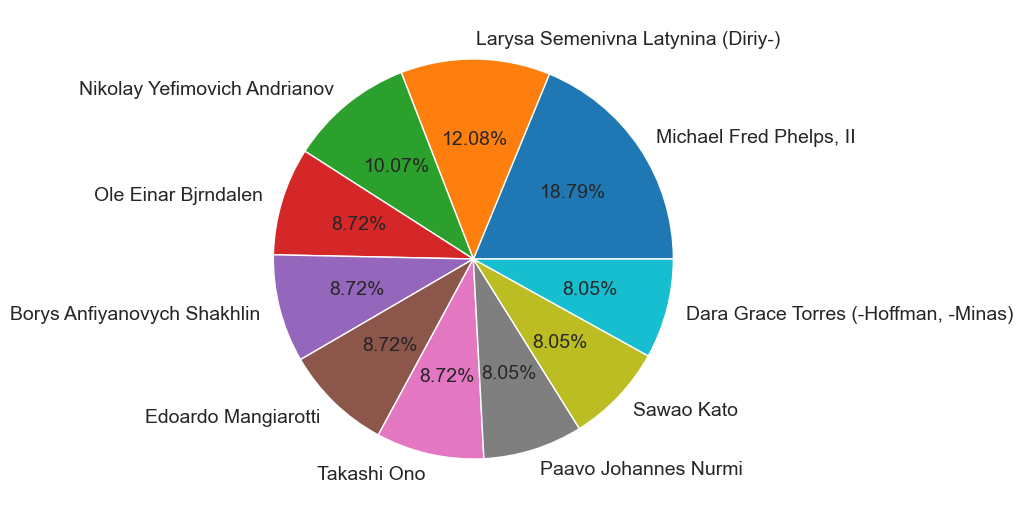

In [29]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Team = df_highest_medals.Name
Count_of_Medal = df_highest_medals.Count_Of_Medals
ax.pie(Count_of_Medal, labels = Team,autopct='%1.2f%%')
plt.show()

<b>Q: Spread of Medal based on Age, Height and Weight<b>

#### Age and Height

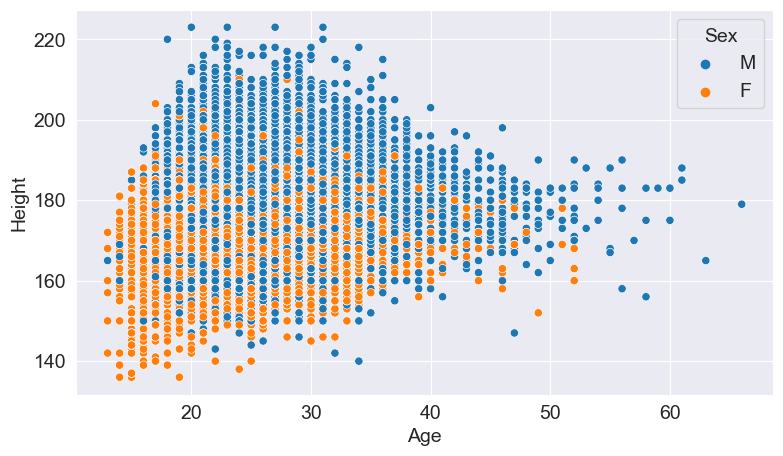

In [31]:
df1 = df[(df.Age != 0) & (df.Height != 0.0) & (df.Medal!='None') & (df.Season =='Summer')]
sns.scatterplot(x=df1.Age, y=df1.Height, hue='Sex', data=df1)
plt.xlabel("Age")
plt.ylabel("Height");

An interesting observation is sportsmans with height less than 140 and age less than 20 are also winning Medals at olympics. Let us see in which sport they for this medals

In [32]:
df1[(df1.Height<=140.0) & (df1.Age <=20)][['Name','Height','Age','Sport']].sort_values(['Sport'])

,Name,Height,Age,Sport
256836,Wang Xin (Ruoxue-),137.0,15,Diving
256837,Wang Xin (Ruoxue-),137.0,15,Diving
13741,Oana Mihaela Ban,139.0,18,Gymnastics
23763,Loredana Boboc,139.0,16,Gymnastics
31837,Diana Laura Bulimar,140.0,16,Gymnastics
69216,Mariya Yevgenyevna Filatova (-Kurbatova),136.0,14,Gymnastics
69222,Mariya Yevgenyevna Filatova (-Kurbatova),136.0,19,Gymnastics
69225,Mariya Yevgenyevna Filatova (-Kurbatova),136.0,19,Gymnastics
108408,Jiang Yuyuan,140.0,16,Gymnastics
143279,Lu Li,136.0,15,Gymnastics


It is clearly visible athlete with lesser heights and age seems to have done well in gymnastics

#### Age and Weight

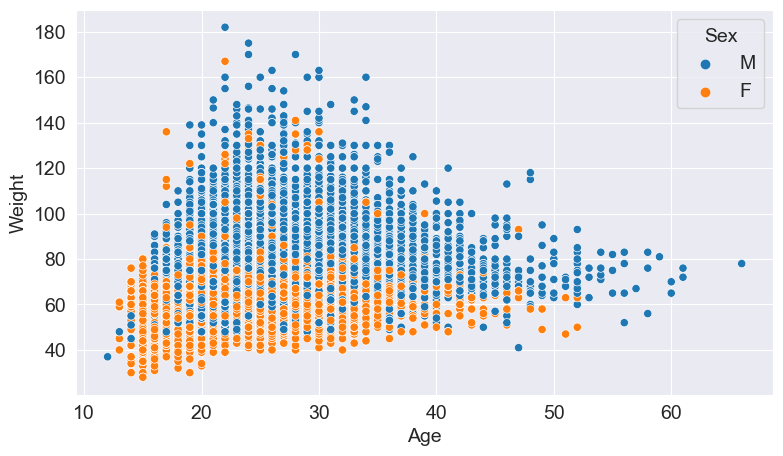

In [33]:
df2 = df[(df.Age != 0) & (df.Weight != 0.0) & (df.Medal!='None')& (df.Season =='Summer')]
sns.scatterplot(x=df2.Age, y=df2.Weight, hue='Sex', data=df2)
plt.xlabel("Age")
plt.ylabel("Weight");

Let us have a look at the medalist having high weight and also the one have low weight

In [34]:
df2[(df2['Weight']>=170) | (df['Weight']<=30)][['Name','Weight','Sport']]

C:\Users\USER\AppData\Local\Temp\ipykernel_21356\2050624400.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[(df2['Weight']>=170) | (df['Weight']<=30)][['Name','Weight','Sport']]


,Name,Weight,Sport
39181,Andrey Ivanovich Chemerkin,170.0,Weightlifting
39182,Andrey Ivanovich Chemerkin,170.0,Weightlifting
69216,Mariya Yevgenyevna Filatova (-Kurbatova),30.0,Gymnastics
69222,Mariya Yevgenyevna Filatova (-Kurbatova),30.0,Gymnastics
69225,Mariya Yevgenyevna Filatova (-Kurbatova),30.0,Gymnastics
143279,Lu Li,30.0,Gymnastics
143280,Lu Li,30.0,Gymnastics
173166,Dmitry Yuryevich Nosov,175.0,Judo
237040,"Christopher J. ""Chris"" Taylor",182.0,Wrestling
256836,Wang Xin (Ruoxue-),28.0,Diving


#### Height and Weight

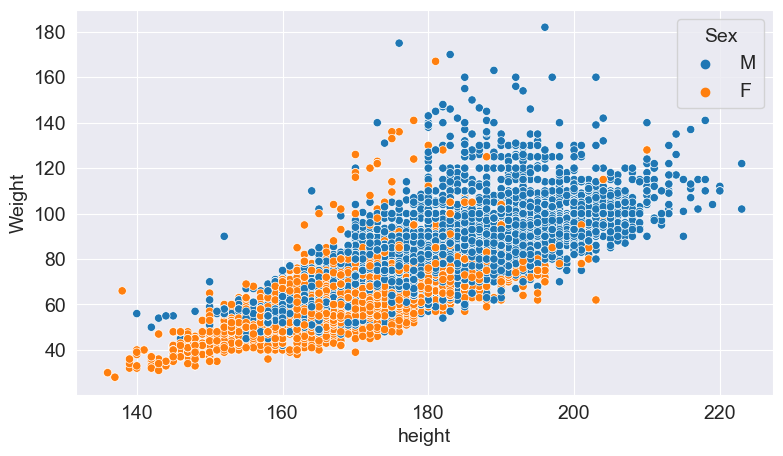

In [35]:
df3 = df[(df.Age != 0) & (df.Weight != 0.0) & (df.Height != 0.0) & (df.Medal!='None') & (df.Season =='Summer')]
sns.scatterplot(x=df3.Height, y=df3.Weight, hue='Sex', data=df3)
plt.xlabel("height")
plt.ylabel("Weight");

Let us look at athletes who has most weight

In [36]:
df3[(df.Weight>160)]

C:\Users\USER\AppData\Local\Temp\ipykernel_21356\2472562620.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[(df.Weight>160)]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
39181,20144,Andrey Ivanovich Chemerkin,M,24,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold
39182,20144,Andrey Ivanovich Chemerkin,M,28,183.0,170.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Men's Super-Heavyweight,Bronze
124420,62843,Olha Vasylivna Korobka,F,22,181.0,167.0,Ukraine,UKR,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Super-Heavyweight,Silver
173166,87041,Dmitry Yuryevich Nosov,M,24,176.0,175.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Half-Middleweight,Bronze
237040,118869,"Christopher J. ""Chris"" Taylor",M,22,196.0,182.0,United States,USA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Bronze
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold


As I observe most of such sport are Wrestling, Weightligting and Judo

<b>Q: Women participation at olympics<b>

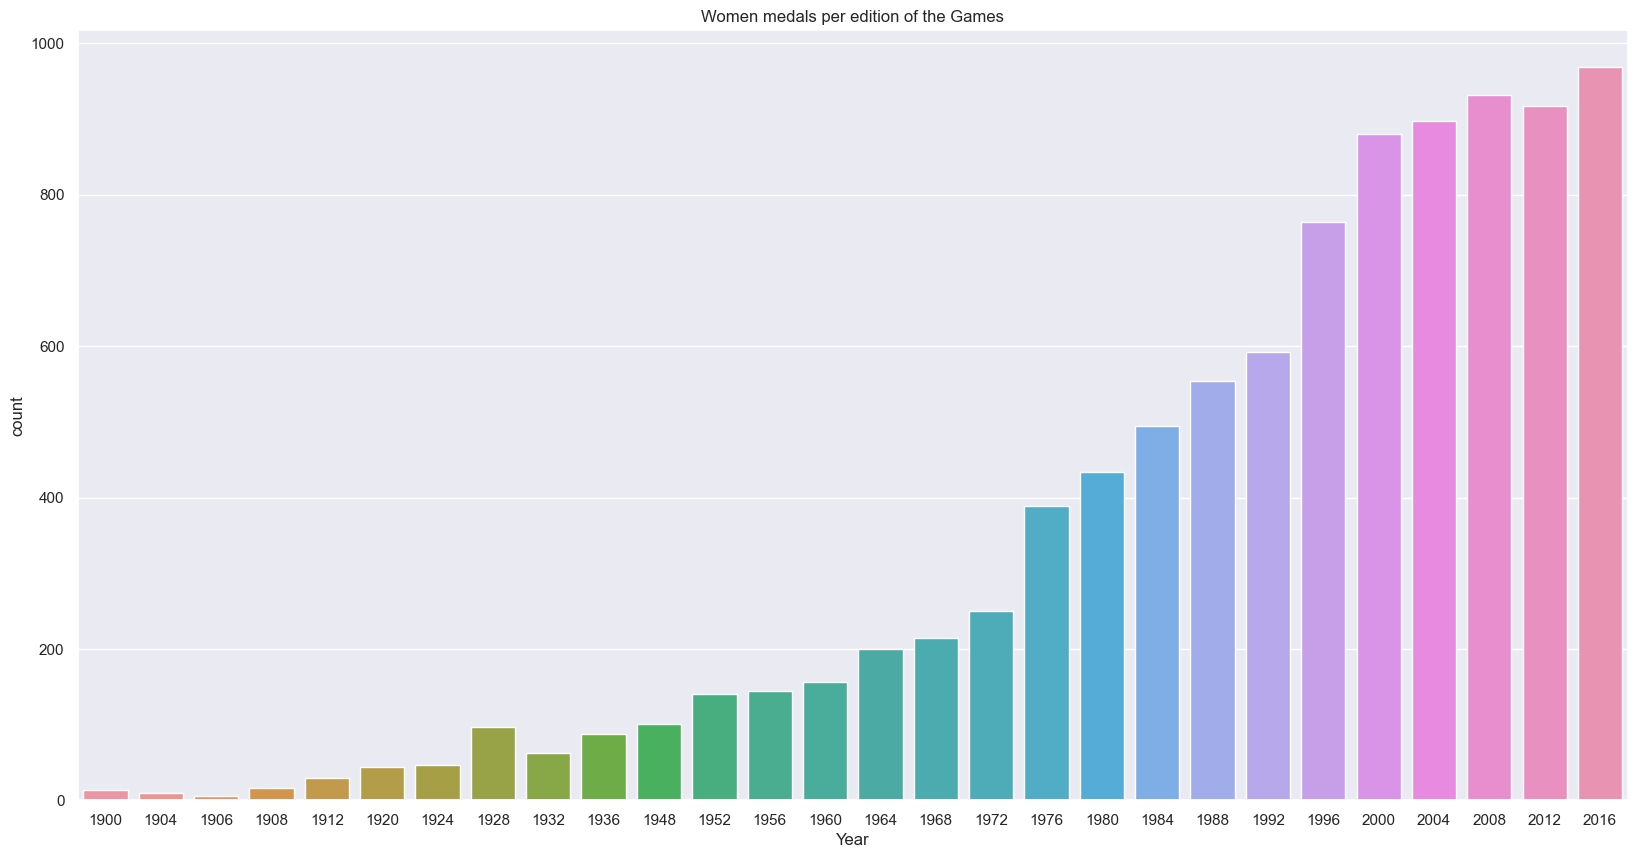

In [37]:
Women_In_Olympics = df[(df.Sex == 'F') & (df.Medal != 'None') & (df.Season =='Summer')]

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=Women_In_Olympics)
plt.title('Women medals per edition of the Games');

As we see the trend, Woman paricipation has been increasing over the years on an average

**Medal won Indiviual with Age more than 50**

In [38]:
df_medal_holders = df[(df.Medal !='None') & (df.Season == 'Summer')]
df_medal_holders['Count_Of_Medals'] = 1

df_medal_holders_above50 = df_medal_holders[df.Age >= 50]

df_medal_holders_above50.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_21356\420094497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medal_holders['Count_Of_Medals'] = 1
C:\Users\USER\AppData\Local\Temp\ipykernel_21356\420094497.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_medal_holders_above50 = df_medal_holders[df.Age >= 50]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Count_Of_Medals
3680,2112,Abdullah Al-Rashidi,M,52,183.0,83.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Skeet,Bronze,1
5077,2894,Derek Swithin Allhusen,M,54,180.0,71.0,Great Britain,GBR,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",Silver,1
5078,2894,Derek Swithin Allhusen,M,54,180.0,71.0,Great Britain,GBR,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Gold,1
7961,4404,Johan August Anker,M,56,0.0,0.0,Norna,NOR,1928 Summer,1928,Summer,Amsterdam,Sailing,Sailing Mixed 6 metres,Gold,1
13393,7272,"Nikolaus ""Klaus"" Balkenhol",M,52,178.0,83.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Dressage, Individual",Bronze,1
13394,7272,"Nikolaus ""Klaus"" Balkenhol",M,52,178.0,83.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Dressage, Team",Gold,1
13396,7272,"Nikolaus ""Klaus"" Balkenhol",M,56,178.0,83.0,Germany,GER,1996 Summer,1996,Summer,Atlanta,Equestrianism,"Equestrianism Mixed Dressage, Team",Gold,1
14364,7744,Ernest Barberolle,M,58,156.0,56.0,France,FRA,1920 Summer,1920,Summer,Antwerpen,Rowing,Rowing Men's Coxed Pairs,Silver,1
17552,9349,Ludger Beerbaum,M,52,190.0,85.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Jumping, Team",Bronze,1
21999,11599,Rudolf Georg Binding,M,60,0.0,0.0,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Literature, Lyric Works",Silver,1


In [39]:
df_medal_holders_above50_list = df_medal_holders_above50.groupby(['Sport']).sum().sort_values('Count_Of_Medals', ascending=False).drop(['ID','Age','Height','Weight','Year'], axis = 1)
df_medal_holders_above50_reset_index = df_medal_holders_above50_list.reset_index()
df_medal_holders_above50_reset_index.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_21356\1565353039.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_medal_holders_above50_list = df_medal_holders_above50.groupby(['Sport']).sum().sort_values('Count_Of_Medals', ascending=False).drop(['ID','Age','Height','Weight','Year'], axis = 1)


,Sport,Count_Of_Medals
0,Equestrianism,53
1,Shooting,50
2,Sailing,46
3,Art Competitions,37
4,Archery,34


Indiviuals above 50 have been doing in Equestrianism, Shooting, Sailing, Art competitions and Archery. These sports seems to have require more mental strength and then physical strength.

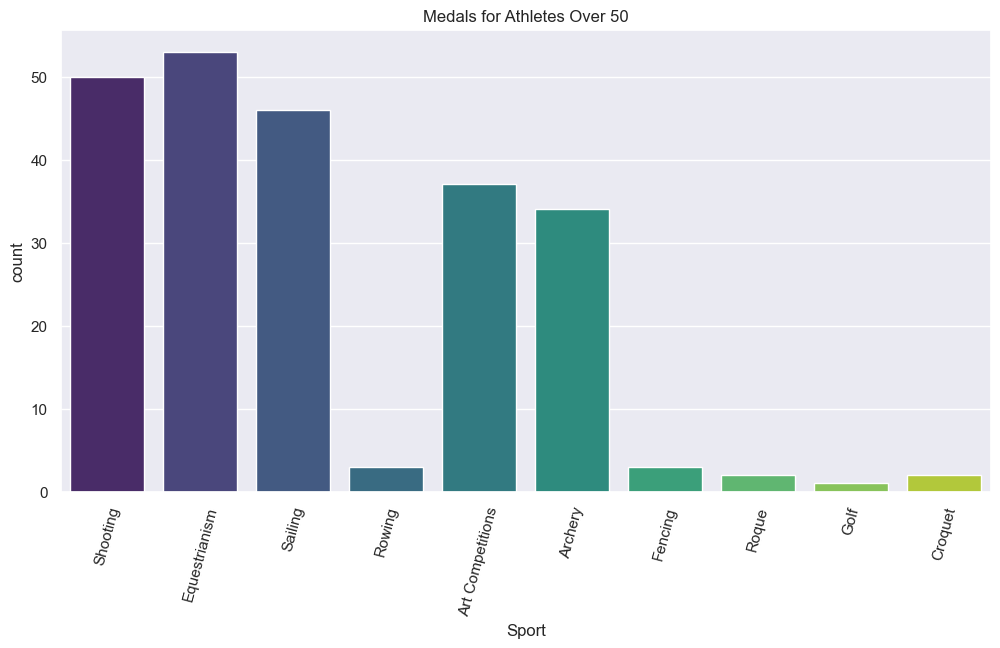

In [42]:
plt.figure(figsize=(12, 6))
plt.tight_layout()
sns.countplot(data=df_medal_holders_above50, x='Sport', palette='viridis')
plt.title('Medals for Athletes Over 50')
plt.xticks(rotation=75)
plt.show()


## Inferences and Conclusions
We've drawn many inferences from the survey. Here's a summary of a few of them:

- US seems to dominants in terms of participation of maximum gold as well as overall participation in games.

- We observe athletes from the age of 12 till the age of 58 years winning medals.

- Summer Olympics have higher no of events and sports as compared to the winter Olympics.

- In the history of 120 years of Olympics, Michael Fred Phelps, II has won maximum medals for his country i.e. 28 Medals

- We see a trend that woman participants across the years in in upward tread.

- Participate with high weight (like > 150) seems to have done well in Wrestling, Weight lifting and Judo.
